In [12]:
import csv
import matplotlib.pyplot as plt
from datetime import datetime

In [23]:
filepath = 'data/sitka_weather_07-2018_simple.csv'
with open(filepath) as f:
    file_reader  = csv.reader(f) 
    header_row = next(file_reader)
    
    for row,col in enumerate(header_row):
        print(row, col)
        
    stations = []
    for i in file_reader:
        stations.append(i[1])
        
print(set(stations))    

0 STATION
1 NAME
2 DATE
3 PRCP
4 TAVG
5 TMAX
6 TMIN
{'SITKA AIRPORT, AK US'}


This dataset contains data from just 1 weather station, "Sitka Airport" including date, precipitation and temperature. For now we're only interested in the temperature data over time. 

In [16]:
with open(filepath) as f:
    file_reader  = csv.reader(f) 
    header = next(file_reader)
    
    #Getting daily highs and low temperatures by indexing
    highs, lows, dates = [], [], []
    
    for row in file_reader:
        highs.append(int(row[5]))
        lows.append(int(row[6]))
        dates.append(row[2])
print(dates)


['2018-07-01', '2018-07-02', '2018-07-03', '2018-07-04', '2018-07-05', '2018-07-06', '2018-07-07', '2018-07-08', '2018-07-09', '2018-07-10', '2018-07-11', '2018-07-12', '2018-07-13', '2018-07-14', '2018-07-15', '2018-07-16', '2018-07-17', '2018-07-18', '2018-07-19', '2018-07-20', '2018-07-21', '2018-07-22', '2018-07-23', '2018-07-24', '2018-07-25', '2018-07-26', '2018-07-27', '2018-07-28', '2018-07-29', '2018-07-30', '2018-07-31']


Dates are currently in string format so we convert to datetime:

In [17]:
with open(filepath) as f:
    file_reader  = csv.reader(f) 
    header = next(file_reader)

    dates = []
    for row in file_reader:
        dates.append(datetime.strptime(row[2],'%Y-%m-%d'))
print(dates)

[datetime.datetime(2018, 7, 1, 0, 0), datetime.datetime(2018, 7, 2, 0, 0), datetime.datetime(2018, 7, 3, 0, 0), datetime.datetime(2018, 7, 4, 0, 0), datetime.datetime(2018, 7, 5, 0, 0), datetime.datetime(2018, 7, 6, 0, 0), datetime.datetime(2018, 7, 7, 0, 0), datetime.datetime(2018, 7, 8, 0, 0), datetime.datetime(2018, 7, 9, 0, 0), datetime.datetime(2018, 7, 10, 0, 0), datetime.datetime(2018, 7, 11, 0, 0), datetime.datetime(2018, 7, 12, 0, 0), datetime.datetime(2018, 7, 13, 0, 0), datetime.datetime(2018, 7, 14, 0, 0), datetime.datetime(2018, 7, 15, 0, 0), datetime.datetime(2018, 7, 16, 0, 0), datetime.datetime(2018, 7, 17, 0, 0), datetime.datetime(2018, 7, 18, 0, 0), datetime.datetime(2018, 7, 19, 0, 0), datetime.datetime(2018, 7, 20, 0, 0), datetime.datetime(2018, 7, 21, 0, 0), datetime.datetime(2018, 7, 22, 0, 0), datetime.datetime(2018, 7, 23, 0, 0), datetime.datetime(2018, 7, 24, 0, 0), datetime.datetime(2018, 7, 25, 0, 0), datetime.datetime(2018, 7, 26, 0, 0), datetime.datetime(20

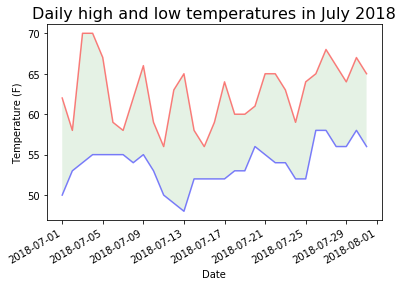

In [27]:
fig, ax = plt.subplots()
ax.plot(dates,highs, c='red', alpha=0.5)
ax.plot(dates,lows, c='blue', alpha=0.5)
ax.fill_between(dates, highs, lows, facecolor='green', alpha=0.1)

ax.set_title('Daily high and low temperatures in July 2018', fontsize=16)
ax.set_xlabel('Date')
ax.set_ylabel('Temperature (F)')
ax.tick_params(which='major')
fig.autofmt_xdate() #Formats dates to appear diagonally

Now we expand to look at an entire year's worth of data

In [29]:
filepath = 'data/sitka_weather_2018_simple.csv'

with open(filepath) as opened_file:
    file_reader = csv.reader(opened_file)
    header = next(file_reader)
    
    dates, highs, lows = [],[],[]
    for i in file_reader:
        dates.append(datetime.strptime(i[2],'%Y-%m-%d'))
        highs.append(int(i[5]))
        lows.append(int(i[6]))
    

Text(0.5, 0, 'Date')

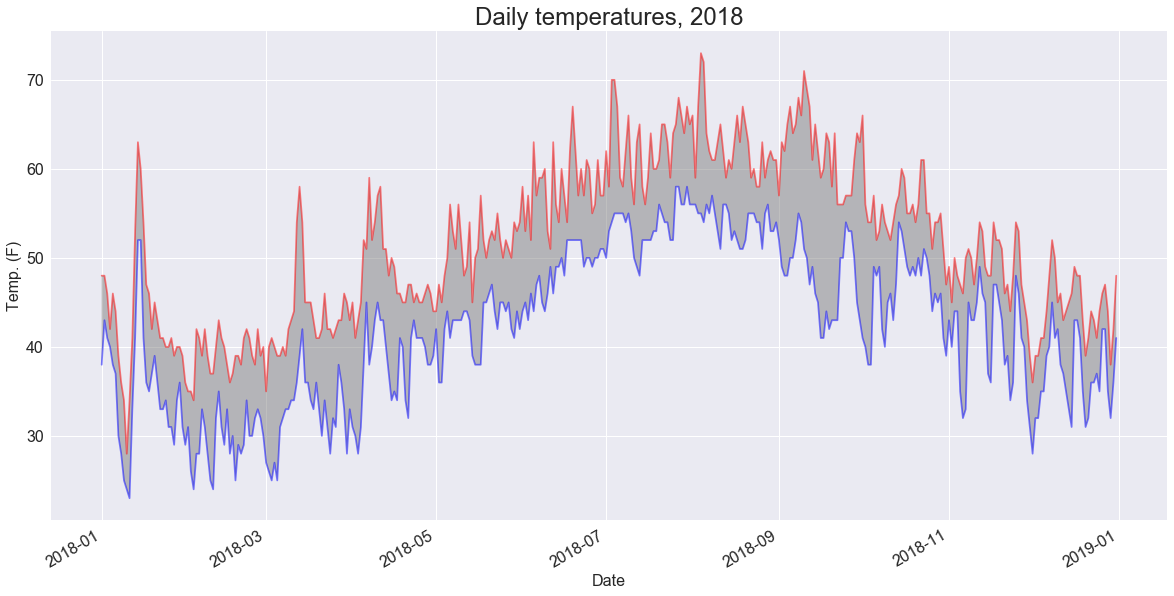

In [39]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(dates, highs, c='red', alpha=0.5)
ax.plot(dates, lows, c='blue', alpha=0.5)
ax.fill_between(dates, lows, highs, facecolor='grey',alpha=0.5)

fig.autofmt_xdate()
ax.tick_params(which='major', labelsize=16)
ax.set_title('Daily temperatures, 2018', fontsize=24)
ax.set_ylabel('Temp. (F)', fontsize=16)
ax.set_xlabel('Date', fontsize=16)

We can compare this graph of Sitka Airport data to that from Death Valley, and analyse the differences in temperatures between the regions.

In [41]:
filepath = 'data/death_valley_2018_simple.csv'

with open(filepath) as opened_file:
    file_reader = csv.reader(opened_file)
    header = next(file_reader)
    
    for row, col in enumerate(header):
        print(row,col)

0 STATION
1 NAME
2 DATE
3 PRCP
4 TMAX
5 TMIN
6 TOBS


In this dataset the data structure is different: temp max and min is in index positions 4 and 5 instead of 5 and 6. There is also a missing data point which causes our code to break: 

In [42]:
with open(filepath) as opened_file:
    file_reader = csv.reader(opened_file)
    header = next(file_reader)
    
    dates_dv, highs_dv, lows_dv = [],[],[]
    for i in file_reader:
        dates_dv.append(datetime.strptime(i[2],'%Y-%m-%d'))
        highs_dv.append(int(i[4]))
        lows_dv.append(int(i[5]))
    

ValueError: invalid literal for int() with base 10: ''

In [43]:
#added error handling: 
with open(filepath) as opened_file:
    file_reader = csv.reader(opened_file)
    header = next(file_reader)
    
    dates_dv, highs_dv, lows_dv = [],[],[]
    for i in file_reader:
        row_date = datetime.strptime(i[2],'%Y-%m-%d')
        
        try:
            row_high = int(i[4])
            row_low  = int(i[5])
            
        except ValueError:
            print(f"Missing value at {row_date}")
            
        else: #Only runs if the try block is successful
            dates_dv.append(row_date)
            highs_dv.append(row_high)
            lows_dv.append(row_low)
    

Missing value at 2018-02-18 00:00:00


Text(0.5, 0, 'Date')

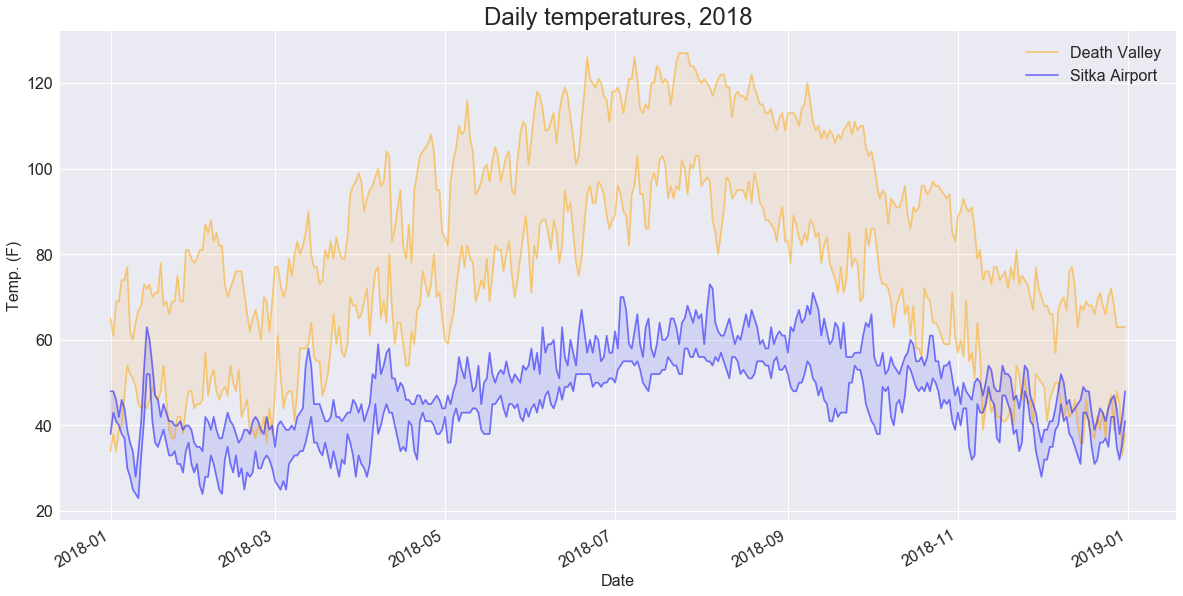

In [51]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(20,10))

#Death valley data
ax.plot(dates_dv, highs_dv, c='orange', alpha=0.5, label='Death Valley')
ax.plot(dates_dv, lows_dv, c='orange', alpha=0.5)
ax.fill_between(dates_dv, lows_dv, highs_dv, facecolor='orange',alpha=0.1)

#Sitka Airport data
ax.plot(dates, highs, c='blue', alpha=0.5, label='Sitka Airport')
ax.plot(dates, lows, c='blue', alpha=0.5)
ax.fill_between(dates, lows, highs, facecolor='blue',alpha=0.1)

ax.legend(fontsize=16)
fig.autofmt_xdate()
ax.tick_params(which='major', labelsize=16)
ax.set_title('Daily temperatures, 2018', fontsize=24)
ax.set_ylabel('Temp. (F)', fontsize=16)
ax.set_xlabel('Date', fontsize=16)

We can conclude that Death Valley temperatures are in general higher than Sitka Airport. Sitka also has a much tighter range, whereas Death Valley's intra-day fluctuations are higher. The rise in temperature between summer and winter is much more drastic with Death Valley, whereas the temperature at Sitka airport is more constant, shown by a flatter trend.  